In [1]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import pandas as pd
import datetime
from matplotlib import pyplot as plt

import tqdm.notebook as nb
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.ticker as mtick
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=10)

# width as measured in inkscape
width = 3.125
height = width / 1.618

# Probability of survival from nomination for deletion

In [3]:
all_biographies2 = pd.read_csv('data/processed/all_biographies2.csv', index_col=False)

In [4]:
len(all_biographies2)

1975929

In [5]:
survival_data_male = all_biographies2[all_biographies2['gender']=='male']
survival_data_female = all_biographies2[all_biographies2['gender']=='female']

kmf_male = KaplanMeierFitter(label='Men')
kmf_female = KaplanMeierFitter(label='Women')


kmf_male = kmf_male.fit(durations=survival_data_male['days_before_nomination'], event_observed=survival_data_male['nominated'])
kmf_female = kmf_female.fit(durations=survival_data_female['days_before_nomination'], event_observed=survival_data_female['nominated'])

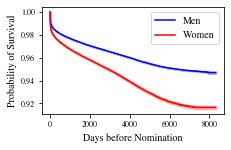

In [6]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.18, bottom=.2, right=.99, top=.97)

kmf_male.plot(color='blue')
kmf_female.plot(color='red')
ax.set_xlabel('Days before Nomination')

ax.set_ylabel('Probability of Survival')
fig.set_size_inches(width, height)
fig.savefig('reports/figures/Male_vs_Female_Survival.png', dpi=200)
fig.show()

# Cox regression analysis

In [7]:
all_biographies2_with_data = pd.read_csv('data/processed/all_biographies2_with_data.csv', index_col=False)

In [8]:
all_biographies2_with_data.head()

,page_title,creation_date_original2,rev_timestamp,Entry,QID,gender,date_of_birth,date_of_death,nominated,days_before_nomination,...,title,BLP,Entry2,Gender,birth,death,Alive,is_Historical,Status,Wikipedia_Age
0,James_Brennan,20041116190813,20041116191644,James Brennan,Q6130205,male,1837-02-25T00:00:00Z,1917-06-13T00:00:00Z,1,0.005914,...,NaN,0,James_Brennan,0.0,1837,1917,0,1.0,Historical,4
1,Paul_Holt,20041127125516,20041127142834,Paul Holt,Q12331079,male,1900,1980-11-16,1,0.064792,...,NaN,0,Paul_Holt,0.0,1900,1980,0,1.0,Historical,4
2,Lewis_B._Schwellenbach,20041225045531,20041225060911,Lewis B. Schwellenbach,Q1767521,male,1894-09-20T00:00:00Z,1948-06-10T00:00:00Z,1,0.051157,...,NaN,0,Lewis_B._Schwellenbach,0.0,1894,1948,0,1.0,Historical,4
3,James_Longstreet,20020418133700,20050306062831,James Longstreet,Q105362228,male,1821-01-08T00:00:00Z,1904-01-02T00:00:00Z,1,1052.702442,...,NaN,0,James_Longstreet,0.0,1821,1904,0,1.0,Historical,2
4,Michael_Donohoe,20050401175247,20050414033806,Michael Donohoe,Q6829914,male,1864-02-22T00:00:00Z,1958-01-17T00:00:00Z,1,12.406470,...,NaN,0,Michael_Donohoe,0.0,1864,1958,0,1.0,Historical,5


In [9]:
fused_var_model = CoxPHFitter()
fused_var_model.fit(all_biographies2_with_data[['days_before_nomination','nominated','Gender', 'Wikipedia_Age','Status']].sample(frac=1), duration_col='days_before_nomination', event_col='nominated', formula="Gender + Wikipedia_Age + Status")

fused_var_model_interaction = CoxPHFitter()
fused_var_model_interaction.fit(all_biographies2_with_data[['days_before_nomination','nominated','Gender', 'Wikipedia_Age','Status']].sample(frac=1), duration_col='days_before_nomination', event_col='nominated', formula="Gender + Wikipedia_Age + Status + Gender*Status")


<lifelines.CoxPHFitter: fitted with 1.97586e+06 total observations, 1.89107e+06 right-censored observations>

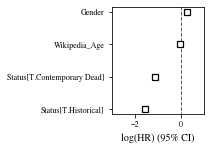

In [10]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.58, bottom=.2, right=.99, top=.97)

fused_var_model.plot(ax=ax)
ax.set_xlim((-3,1))

fig.set_size_inches(width, height)

fig.savefig('reports/figures/Cox_prop_model.png', dpi=200)


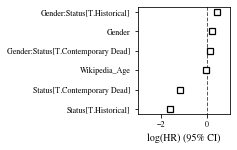

In [11]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.58, bottom=.2, right=.99, top=.97)

fused_var_model_interaction.plot(ax=ax)
ax.set_xlim((-3,1))

fig.set_size_inches(width, height)
fig.savefig('reports/figures/Cox_prop_model_interaction.png', dpi=200)


In [12]:
fused_var_model.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.CoxPHFitter: fitted with 1.97586e+06 total observations, 1.89107e+06 right-censored observations>
             duration col = 'days_before_nomination'
                event col = 'nominated'
      baseline estimation = breslow
   number of observations = 1.97586e+06
number of events observed = 84792
   partial log-likelihood = -1193035.17
         time fit was run = 2025-04-21 21:46:56 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
Gender                        0.26       1.30       0.01             0.25             0.28                 1.28                 1.32
Wikipedia_Age                -0.03       0.97       0.00            -0.03            -0.03                 0.97                 0.97
Status[T.Contemporary Dead]  -1.13       0.32       0.01            -1.16            -1.11                 0.31                 0.33
Status[T.Historical]         -1.55       0.21       0.01            -1.57            -1.52                 0.21                 0.22

                              cmp to       z      p   -log2(p)
covariate                                                     
Gender                          0.00   33.06 <0.005     793.95
Wikipedia_Age                   0.00  -44.93 <0.005        inf
Status[T.Contemporary Dead]     0.00  -91.72 <0.005        inf
Status[T.Historical]            0.00 -128.85 <0.005        inf
---
Concordance = 0.67
Partial AIC = 2386078.34
log-likelihood ratio test = 33193.90 on 4 df
-log2(p) of ll-ratio test = inf

In [13]:
fused_var_model_interaction.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.CoxPHFitter: fitted with 1.97586e+06 total observations, 1.89107e+06 right-censored observations>
             duration col = 'days_before_nomination'
                event col = 'nominated'
      baseline estimation = breslow
   number of observations = 1.97586e+06
number of events observed = 84792
   partial log-likelihood = -1192943.17
         time fit was run = 2025-04-21 21:48:19 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
Gender                               0.23       1.26       0.01             0.21             0.25                 1.24                 1.28
Wikipedia_Age                       -0.03       0.97       0.00            -0.03            -0.03                 0.97                 0.97
Status[T.Contemporary Dead]         -1.16       0.31       0.01            -1.19            -1.13                 0.31                 0.32
Status[T.Historical]                -1.62       0.20       0.01            -1.64            -1.59                 0.19                 0.20
Gender:Status[T.Contemporary Dead]   0.13       1.14       0.03             0.07             0.19                 1.07                 1.21
Gender:Status[T.Historical]          0.42       1.53       0.03             0.36             0.48                 1.44                 1.62

                                     cmp to       z      p   -log2(p)
covariate                                                            
Gender                                 0.00   26.69 <0.005     518.79
Wikipedia_Age                          0.00  -45.10 <0.005        inf
Status[T.Contemporary Dead]            0.00  -84.55 <0.005        inf
Status[T.Historical]                   0.00 -121.86 <0.005        inf
Gender:Status[T.Contemporary Dead]     0.00    4.14 <0.005      14.79
Gender:Status[T.Historical]            0.00   13.71 <0.005     139.78
---
Concordance = 0.67
Partial AIC = 2385898.34
log-likelihood ratio test = 33377.91 on 6 df
-log2(p) of ll-ratio test = inf

In [14]:
%matplotlib inline

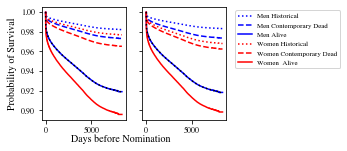

In [15]:

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,sharey=True)
fig.subplots_adjust(left=.17, bottom=.16, right=.99, top=.97)


cycler = plt.cycler(linestyle=[':', "--", "-",':', "--", "-"],
                    color = ['blue','blue','blue','red','red', 'red'],
)
ax[0].set_prop_cycle(cycler)

fused_var_model.plot_partial_effects_on_outcome(covariates=['Gender','Status'],
                                               values=[[0,'Historical'],[0,'Contemporary Dead'],[0,'Alive'],[1,'Historical'],[1,'Contemporary Dead'],[1,'Alive']],
                                               color = ['blue','blue','blue','red','red', 'red'],
                                                      
                                               ax=ax[0]
                                                       
                                             
                                              )
ax[0].set_ylabel('Probability of Survival')
ax[0].legend(labels=['Men Historical','Men Contemporary Dead','Men Alive','Women Historical','Women Contemporary Dead','Women  Alive'], 
             loc='best', bbox_to_anchor=(3.6, 1), fontsize='x-small')


ax[1].set_prop_cycle(cycler)

fused_var_model_interaction.plot_partial_effects_on_outcome(covariates=['Gender','Status'],
                                               values=[[0,'Historical'],[0,'Contemporary Dead'],[0,'Alive'],[1,'Historical'],[1,'Contemporary Dead'],[1,'Alive']],
                                               color = ['blue','blue','blue','red','red', 'red'],
                                                      
                                               ax=ax[1]
                                                       
                                             
                                              )
ax[1].set_ylabel('Probability of Survival')
ax[1].legend('',frameon=False)
fig.text(0.3,0,'Days before Nomination', ha='left')

fig.set_size_inches(width, height)
fig.savefig('reports/figures/marginal_effect.png', bbox_inches='tight',dpi=200)


In [26]:
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

L1 = fused_var_model.log_likelihood_    #-1193035.17


L2 = fused_var_model_interaction.log_likelihood_   #-1192943.17


LR = likelihood_ratio(L1,L2)


p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print('p: %.30f' % p )

# p: 0.000000000000000000000000000000

p: 0.000000000000000000000000000000


# Experiment with Decision

In [ ]:
# data_for_compete_risk_nominated['event'].apply(lambda x:x.replace("<span style=\"color:red;\">","")
#                                                .replace("</span>","")
#                                                .replace("<font color=green>","")
#                                                .replace("</font>","")
#                                                .replace("<font color=red>","")
#                                                .replace("<s>","")
#                                                .replace("</s>","")                                          
#                                                .replace(".","")
#                                                .replace(":","")
#                                                .replace(",","")
#                                                .replace("deleted","delete")
#                                                .replace("deletion","delete")
#                                                .replace("[[wpsoftdelete|","")
#                                                .replace("delete]]","delete")
#                                                .replace("kept","keep")
#                                                .replace("redirected","redirect")
#                                                .replace("speedily ","")
#                                                .replace("speedy ","")
#                                                .replace("soft ","")
#                                                .replace("weak ","")
#                                                .replace("snow ","")
#                                                .replace("strong ","")
#                                                .replace("boldly ","")
#                                                .replace("snowball ","")
#                                                .replace("unanimous ","")
#                                                .replace("[[wpsnow]] ","")
#                                                .replace("[[wpsnow|snow]] ","")
#                                                .replace("already ","")
#                                                .replace("procedural ","")
#                                                .replace("nomination ","")
#                                                .replace("nom ","")
#                                                .replace(", withdrawn","")
#                                                .replace(" without prejudice","")
#                                                .replace(" (non-admin closure)","")
#                                                .replace(" to delete","")
#                                                .replace(" for delete","")
#                                                .replace(" (no consensus)","")
#                                                .replace(" and cleanup","")
#                                                .replace(" and salt","")
#                                                .replace(" by nominator","")
#                                                .replace(" by nom","")
#                                                .replace(", default to keep","")
#                                                .replace("; default to keep","")
#                                                .replace("; keep","")
#                                                .replace("flagged as ","")
#                                                .replace(" (withdrawn)","")
#                                                .replace("/withdrawn","")
#                                                .replace(" all","")
#                                                .replace(" both","")
#                                                .replace(" (non-admin)","")                                          
#                                                .replace("delete (a7)","delete")
#                                                .replace("delete a7","delete")
#                                                .replace("delete as copyvio","delete")
#                                                .replace(" per delete","")
#                                                .replace("delete per delete","delete")
#                                                .replace("a7","delete")
#                                                .replace("copyvio","delete")
#                                                .replace("speedied","delete")
#                                                .replace("speedy","delete")
#                                                .replace("delete delete","delete")
#                                                .replace(" delete","delete")
#                                                .replace("delete perdelete","delete")
#                                                .replace("delete -delete","delete")
#                                                .replace("delete underdelete","delete")
#                                                .replace("delete ","delete")
#                                                .replace("deletefor now","delete")
#                                                .replace("delete-delete","delete")                                          
#                                                .replace(", no consensus","")
#                                                .replace("<font color=blue>","")
#                                                .replace(" as non-notable","")
#                                                .replace("/redirect","")
#                                                .replace("no consensus default to keep","keep")
#                                               .replace("no consensus keep","keep")
#                                               .replace("no consensus defaulting to keep","keep")
#                                               .replace("keep no consensus","keep")
#                                               .replace("keep withdrawn","keep")
#                                               .replace("close","keep")
#                                               .replace("withdrawn","keep")
#                                               .replace("keepd","keep")
#                                               .replace("procedurally keep","keep")
#                                               .replace("keep keep","keep")
#                                               .replace("keep - keep","keep")
#                                               .replace("keep and expand","keep")
#                                                .replace("withdraw","keep")
#                                                .replace("keep; keep","keep")
#                                                .replace("not delete","keep")
#                                                .replace(" keep","keep")
#                                                .replace("keep for now","keep")
#                                                .replace("[[wpsnow|keep]]","keep")
#                                                .replace("keep andkeep","keep")
#                                                .replace("'keep","keep")
#                                                .replace("keep per [[wpsnow]]","keep")
#                                                .replace("nominatorkeep","keep")
#                                                .replace("keep/keep","keep")
#                                                .replace("move","keep")
#                                                .replace("keep as moot","keep")
#                                                .replace("[[wikipediakeep|keep]]","keep")
#                                                .replace("[[wpsk|keep]]","keep")
#                                                .replace("[[wpkeep]]","keep")
#                                                .replace("moot","keep")
#                                                .replace("notdelete","keep")
#                                                .replace("keep and keep","keep")
#                                                .replace("keepal","keep")
#                                                .replace("keepd","keep")
#                                                .replace("no consensus =keep","keep")
#                                                .replace("[[wpsnow|snowball]]keep","keep")                                         
#                                               .replace("delete and redirect","redirect")
#                                               .replace("deleteand redirect","redirect")                                           
#                                               .replace("merge and redirect","merge")
#                                               .replace("merged","merge")                                           
#                                               .replace("no concensus","no consensus")
#                                               .replace(" no consensus","no consensus")
#                                               .replace("no-consensus","no consensus")                                           
#                                               .replace("no opinion","comment")
#                                               .replace("delete per delete","delete")
#                                               .replace("deleteg7","delete")                                          
#                                           )

# Covariance over time(Multi-State-Model)

In [27]:
result_compete_risk_all = pd.read_csv('data/processed/data_for_compete_risk_all_iter_all_results3.csv', index_col=False)

In [28]:
result_compete_risk_all=result_compete_risk_all[result_compete_risk_all['action']!='remove']

In [29]:
def plot_compete(action):
    
    plt.rc('font', family='serif', serif='Times')
    plt.rc('xtick', labelsize=5.5)
    plt.rc('ytick', labelsize=6)
    plt.rc('axes', labelsize=6)

    width = .72
    height = 1.618 

    coef_list=result_compete_risk_all[(result_compete_risk_all['action']==action)][['year','covariate','estimate']]
    se_list=result_compete_risk_all[(result_compete_risk_all['action']==action)][['year','covariate','robust.se']]
    max_limit_upper=coef_list['estimate'].max()
    max_limit_upper = max_limit_upper + list(result_compete_risk_all[result_compete_risk_all['estimate']==max_limit_upper]['robust.se'])[0]
    min_limit_upper=coef_list['estimate'].min()
    min_limit_upper = min_limit_upper + list(result_compete_risk_all[result_compete_risk_all['estimate']==min_limit_upper]['robust.se'])[0]


    Pvalue_list=result_compete_risk_all[(result_compete_risk_all['action']==action)][['year','covariate','p.value']]
    alpha_plot=2
    Pvalue_list['p.value2']=Pvalue_list['p.value'].apply(lambda x: 10 if x<0.05 else alpha_plot)

    
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.18, bottom=.2, right=.99, top=.97)

    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Historical']['year'],coef_list[coef_list['covariate']=='Historical']['estimate'], yerr=se_list[se_list['covariate']=='Historical']['robust.se'], alpha=.5, c= 'black', linestyle='dotted', linewidth=0.5)

    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Historical']['year'].iloc[ii],coef_list[coef_list['covariate']=='Historical']['estimate'].iloc[ii],label='Historical',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Historical']['p.value2'].iloc[ii],facecolors='none',edgecolors='#a6cee3') 
    
    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Contemporary Dead']['year'],coef_list[coef_list['covariate']=='Contemporary Dead']['estimate'], yerr=se_list[se_list['covariate']=='Contemporary Dead']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Contemporary Dead']['year'].iloc[ii],coef_list[coef_list['covariate']=='Contemporary Dead']['estimate'].iloc[ii],label='Contemporary_Dead',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Contemporary Dead']['p.value2'].iloc[ii], facecolors='none', edgecolors='#b2df8a')

    p=ax.errorbar(coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['year'],coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['estimate'], yerr=se_list[se_list['covariate']=='Gender:Contemporary Dead']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['year'].iloc[ii],coef_list[coef_list['covariate']=='Gender:Contemporary Dead']['estimate'].iloc[ii],label='Gender:Contemporary Dead',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Gender:Contemporary Dead']['p.value2'].iloc[ii], facecolors='none', edgecolors='#33a02c')    
    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Gender:Historical']['year'],coef_list[coef_list['covariate']=='Gender:Historical']['estimate'], yerr=se_list[se_list['covariate']=='Gender:Historical']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Gender:Historical']['year'].iloc[ii],coef_list[coef_list['covariate']=='Gender:Historical']['estimate'].iloc[ii],label='Gender:Historical',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Gender:Historical']['p.value2'].iloc[ii], facecolors='none', edgecolors='#1f78b4')    
    
    
    p=ax.errorbar(coef_list[coef_list['covariate']=='Gender']['year'],coef_list[coef_list['covariate']=='Gender']['estimate'], yerr=se_list[se_list['covariate']=='Gender']['robust.se'], alpha= 0.5, c= 'black', linestyle='dotted', linewidth=0.5)
    for ii in range(len(coef_list['year'].unique())):
        ax.scatter(coef_list[coef_list['covariate']=='Gender']['year'].iloc[ii],coef_list[coef_list['covariate']=='Gender']['estimate'].iloc[ii],label='Gender',marker='o', s=Pvalue_list[Pvalue_list['covariate']=='Gender']['p.value2'].iloc[ii], facecolors='none', edgecolors='#fb9a99')    
    
    

    labels = ['Gender','Historical','Gender $\\times$ \n Historical','Cont. Dead','Gender $\\times$ \n Cont. Dead']
    colors=['#fb9a99','#a6cee3', '#1f78b4', '#b2df8a', '#33a02c' ] 



    if action == "Delete":
        
        leg=ax.legend(labels=labels,loc='best',fontsize=4.72, handletextpad=0.05)

        for i, j in enumerate(leg.legendHandles):
            j.set_color(colors[i])
            j._sizes = [5]


    
   
    
    if action in ['Redirect','Merge']:
        ax.annotate(r'Ends at $'+str(round(max_limit_upper,2))+'$', xy=(2005, 2.1), xytext=(2009, 1.5), fontsize=4, arrowprops=dict(facecolor='black', shrink=1, headlength=1, width=.005,headwidth=2), )
        ax.annotate(r'Ends at $'+str(round(min_limit_upper,2))+'$', xy=(2005, -2), xytext=(2009, -1.8), fontsize=4, arrowprops=dict(facecolor='black', shrink=1, headlength=1, width=.005,headwidth=2), )

        ax.set_ylim(-2.2,2.2)
        
        
    
    
    

    ax.plot(coef_list['year'].unique(),np.zeros(len(coef_list['year'].unique())), linestyle='dotted', color='black', alpha=.8, linewidth=0.9)
    ax.set_xticks(coef_list['year'].unique().astype(int))
    ax.set_xticklabels(ax.get_xticks(), rotation = 0)
    ax.xaxis.set_major_locator(MultipleLocator(5))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.set_title('$\\^\\beta$ ('+action + ')', fontsize=8)   
    ax.tick_params(direction='out', length=5, width=1)
    ax.tick_params(which='major', pad=1)
    
    fig_dict={'Nominated':'Fig7a','Delete':'Fig7b','Keep':'Fig7c','Redirect':'Fig7d','Merge':'Fig7e'}    
    fig.tight_layout()
    
    fig.set_size_inches(width, height)
    fig.show()
    fig.savefig('reports/figures/'+fig_dict[action]+'-decision_retrospective'+action+'.png', bbox_inches='tight',dpi=200)


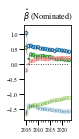

In [30]:
plot_compete('Nominated')

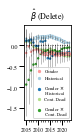

In [31]:
plot_compete('Delete')

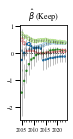

In [32]:
plot_compete('Keep')

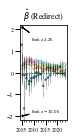

In [33]:
plot_compete('Redirect')

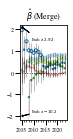

In [34]:
plot_compete('Merge')

# Study on the direction on Merge and Redirect

# Permutation Test

In [35]:
data_redirect_decision2_all = pd.read_csv('data/raw/data_redirect_decision2_all.csv', index_col=False)
data_merge_decision2_all = pd.read_csv('data/raw/data_merge_decision2_all.csv', index_col=False)

data_redirect_decision2_all3=data_redirect_decision2_all[data_redirect_decision2_all['QID2']!='no data']
data_merge_decision2_all3=data_merge_decision2_all[data_merge_decision2_all['QID2']!='no data']


data_redirect_decision2_all3['Gender']= data_redirect_decision2_all3['Gender'].apply(lambda x: 'Men' if x==0 else 'Women')
data_redirect_decision2_all3['instance of2']= data_redirect_decision2_all3.apply(lambda x: x['Gender2'] if x['instance of']=='human' else 'not human', axis=1)

data_merge_decision2_all3['Gender']= data_merge_decision2_all3['Gender'].apply(lambda x: 'Men' if x==0 else 'Women')
data_merge_decision2_all3['instance of2']= data_merge_decision2_all3.apply(lambda x: x['Gender2'] if x['instance of']=='human' else 'not human', axis=1)

In [36]:
def permutation_test_for_outcomes(data, option):

    
    men=data[data['Gender']=='Men'][['Gender','instance of2']]
    men['Gender of Alter']=men['instance of2'].apply(lambda x: 'same' if x=='male' else('opposite' if x=='female' else 'non-bios'))
    women=data[data['Gender']=='Women'][['Gender','instance of2']]
    women['Gender of Alter']=women['instance of2'].apply(lambda x: 'same' if x=='female' else('opposite' if x=='male' else 'non-bios'))
    biography_all= pd.concat([men.drop(columns=['instance of2']),women.drop(columns=['instance of2'])])

    biography_all
    contingency_table=pd.crosstab(biography_all['Gender'], biography_all['Gender of Alter'])
    contingency_table = contingency_table.rename_axis("Group", axis="index")
    table= contingency_table.div(contingency_table.sum(axis=1), axis=0)
    print(table)

    







    n_permutations = 1000
    perm_stats = []
    alter_column = option + '_to2'
    men_expected = []
    women_expected = []
    table3 =pd.DataFrame()


    for _ in nb.tqdm(range(n_permutations)):

        shuffled_data = data.copy()
        shuffled_data_part = pd.DataFrame(np.random.permutation(data[[alter_column,'instance of2']]), columns=[alter_column,'instance of2'])
        shuffled_data[alter_column]= shuffled_data_part[alter_column]
        shuffled_data['instance of2']= shuffled_data_part['instance of2']
        men=shuffled_data[shuffled_data['Gender']=='Men'][['Gender','instance of2']]
        men['Gender of Alter']=men['instance of2'].apply(lambda x: 'same' if x=='male' else('opposite' if x=='female' else 'non-bios'))
        women=shuffled_data[shuffled_data['Gender']=='Women'][['Gender','instance of2']]
        women['Gender of Alter']=women['instance of2'].apply(lambda x: 'same' if x=='female' else('opposite' if x=='male' else 'non-bios'))
        shuffled_data_biography= pd.concat([men.drop(columns=['instance of2']),women.drop(columns=['instance of2'])])
        contingency_table=pd.crosstab(shuffled_data_biography['Gender'], shuffled_data_biography['Gender of Alter'])
        contingency_table = contingency_table.rename_axis("Group", axis="index")
        table2=contingency_table.div(contingency_table.sum(axis=1), axis=0)
        table3=pd.concat([table3,table2])
    
   
    means=table3.groupby('Group').mean()
    stds=table3.groupby('Group').std()
    print(means)
    table3=table3.reset_index()
    men_tab=table3[table3['Group']=='Men']
    women_tab=table3[table3['Group']=='Women']
    
    return table,men_tab, women_tab

    
#     
    

In [ ]:
table_re,men_tab_re, women_tab_re=permutation_test_for_outcomes(data_redirect_decision2_all3, 'redirect')

Gender of Alter  non-bios  opposite      same
Group                                        
Men              0.735579  0.013474  0.250947
Women            0.708553  0.111932  0.179514


  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
table_me,men_tab_me, women_tab_me=permutation_test_for_outcomes(data_merge_decision2_all3, 'merge')

Gender of Alter  non-bios  opposite      same
Group                                        
Men              0.583765  0.017271  0.398964
Women            0.458333  0.226852  0.314815


  0%|          | 0/1000 [00:00<?, ?it/s]

Gender of Alter  non-bios  opposite      same
Group                                        
Men              0.664117  0.073040  0.262843
Women            0.658023  0.267255  0.074722


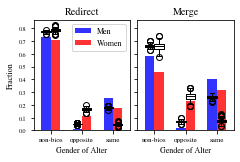

In [45]:
width = 3.125
height = width / 1.618
plt.rc('font', family='serif', serif='Times')
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=6)
plt.rc('axes', labelsize=8)
# set width of bar 
barWidth = 0.6
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,sharey=True)

ax[0]=table_re.T.plot(kind='bar', ax=ax[0], color=['blue','red'], width=barWidth, alpha=.8)
xval= ax[0].get_xticks()

men_tab_re.boxplot( color='black', positions=[xval[0]-barWidth/4,xval[1]-barWidth/4,xval[2]-barWidth/4],grid=False, ax=ax[0])
women_tab_re.boxplot( color='black', positions=[xval[0]+barWidth/4,xval[1]+barWidth/4,xval[2]+barWidth/4],grid=False, ax=ax[0])
ticks = table_re.columns
ax[0].set_title("Redirect", fontsize=10)
ax[0].legend(fontsize=8)

ax[1]=table_me.T.plot(kind='bar', ax=ax[1], color=['blue','red'], width=barWidth, alpha=.8)
xval= ax[1].get_xticks()
men_tab_me.boxplot( color='black', positions=[xval[0]-barWidth/4,xval[1]-barWidth/4,xval[2]-barWidth/4],grid=False, ax=ax[1])
women_tab_me.boxplot( color='black', positions=[xval[0]+barWidth/4,xval[1]+barWidth/4,xval[2]+barWidth/4],grid=False, ax=ax[1])
ticks = table_me.columns


ax[1].set_title("Merge", fontsize=10)
ax[1].get_legend().remove()
plt.xticks(xval,ticks)
ax[0].set_ylabel('Fraction')
fig.tight_layout()
fig.set_size_inches(width, height)
fig.savefig('reports/figures/Fig6-Direction_to_merge_and_redirect.png', dpi=200, bbox_inches='tight')
fig.show()
